# Introduction course in Data Science  - Final project


![Algebra](https://repozitorij.algebra.hr/sites/repozitorij.algebra.hr/files/algebra_subbrand_vu_color-black_h_1.png)

=========================================================================================================================

*made by Mislav Spajić, 02. 2020.*   

---------------------------------------------------------------------------------------------------------------

## Table of Contents

[1. Importing Python modules and initial setup](#import)

[2. Connecting SQL server to Jupyter notebook](#connect)

[3. Columns explanation](#explanation)

[4. Exploring and cleaning data](#explore_main)

   > [4.1. Basic info about data](#explore_basic)   
   > [4.2. Categorical variables](#explore_cat)    
   > [4.3. Numerical variables](#explore_num)
   
[5. Data analysis and visualisation](#dvad_main)

   > [5.1. Distribution of numericals](#dvad_distributionn)    
   > [5.2. Distribution of categoricals](#dvad_distributionc)    
   > [5.3. Variable relationship](#dvad_rel)
  
   
---------------------------------------------------------------------
   
   

## 1. Importing Python modules and initial setup<a name="import"></a>
--------------------------------------------------------

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline 
#Jupyter inline magic command needed to display plots
plt.style.use("ggplot")
#Setting different plot style than default
pyodbc.pooling = False
#For closing connection instantly, no hanging

## 2. Connecting SQL server to Jupyter notebook<a name="connect"></a>
--------------------------------------------------------

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-77H1C3V\SQLEXPRESS;'
                      'Database=US2018;'
                      'Trusted_Connection=yes;')

In [3]:
# Importing columns which will be analyzed to a dataframe object
dfUS = pd.read_sql_query('''SELECT DBWT, DOB_MM, DOB_WK, SEX, MAGER, MEDUC, MRACE15, FRACE15, BMI, WTGAIN
                                    FROM US2018.dbo.Births''', conn)
conn.close()
#Checking data on a small sample
dfUS.sample(3)

,DBWT,DOB_MM,DOB_WK,SEX,MAGER,MEDUC,MRACE15,FRACE15,BMI,WTGAIN
2752959,3562,8,2,F,31,5,1,1,31.3,51
1984760,2664,8,6,F,26,3,2,99,21.5,32
2018001,3336,2,6,M,27,4,1,1,22.3,27


## 3. Columns explanation<a name="explanation"></a>
--------------------------------------------------------

**DBWT** - Birth Weight – Detail in Grams {0227-8165 : Number of grams, 9999 : Not stated birth weight}

**DOB_MM** - Birth Month

**DOB_WK** - Birth Day of Week {1:Sunday, 2:Monday, 3: Tuesday, 4:Wednesday, 5: Thursday, 6: Friday, 7 : Saturday}

**SEX** - Sex of Infant {M : Male, F : Female}

**MAGER** - Mother's Age {50 is 50 and over}

**MEDUC** - Mother's education { 
                                 1. : 8th grade or less,    
                                 2. : 9th through 12th grade with no diploma,    
                                 3. : High school graduate or GED completed,    
                                 4. : Some college credit, but not a degree,    
                                 5. : Associate degree (AA,AS),    
                                 6. : Bachelor’s degree (BA, AB, BS),    
                                 7. : Master’s degree (MA, MS, MEng, MEd, MSW, MBA),    
                                 8. : Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD),   
                                 9. : Unknown  }
                             
**MRACE15** - Mother's Race Recode 15 { 
                                        1. : White,
                                        2. : Black,
                                        3. : AIAN,
                                        4. : Asian Indian,
                                        5. : Chinese,
                                        6. : Filipino,
                                        7. : Japanese,
                                        8. : Korean,
                                        9. : Vietnamese,
                                        10. : Other Asian,
                                        11. : Hawaiian,
                                        12. : Guamanian,
                                        13. : Samoan,
                                        14. : Other Pacific Islander,
                                        15. : More than one race  }
                                        
**FRACE15** - Father's Race Recode 15 { Same codes as mother's + 99 : Unknown or Not stated }

**BMI** - Body Mass Index of Mother { 13.0-69.9 : Body Mass Index, 99.9 : Unknown or Not stated }

**WTGAIN** - Mother's Weight Gain {00-97 : Weight gain in pounds, 98 : 98 and over, 99 : Unknown or Not stated }
________________________________________________________________________________________________

Info from : <https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm#Tools>  - User's guide 2018

## 4. Exploring and cleaning data<a name="explore_main"></a>
------------------------------------------------------------------------

### 4.1. Basic info about data<a name="explore_basic"></a>

In [4]:
dfUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801534 entries, 0 to 3801533
Data columns (total 10 columns):
DBWT       int64
DOB_MM     object
DOB_WK     object
SEX        object
MAGER      int64
MEDUC      object
MRACE15    object
FRACE15    object
BMI        float64
WTGAIN     int64
dtypes: float64(1), int64(3), object(6)
memory usage: 290.0+ MB


In [5]:
dfUS.isnull().sum()

DBWT       0
DOB_MM     0
DOB_WK     0
SEX        0
MAGER      0
MEDUC      0
MRACE15    0
FRACE15    0
BMI        0
WTGAIN     0
dtype: int64

No NULL values, no need to clean them.

### 4.2. Categorical variables<a name="explore_cat"></a>

In [6]:
#Checking categorical variables, if they have some other values, other than those noted in columns explanation
for col in dfUS.columns:
    if dfUS[col].dtype=="object":
        print(dfUS[col].value_counts())

8     345687
7     329851
10    327740
9     323685
5     321448
3     316824
1     315593
6     315585
12    311581
11    309475
4     299125
2     284940
Name: DOB_MM, dtype: int64
5    613402
3    609389
4    607452
6    603900
2    577010
7    423123
1    367258
Name: DOB_WK, dtype: int64
M    1943273
F    1858261
Name: SEX, dtype: int64
3    968380
6    776969
4    752253
7    358924
2    358686
5    314455
1    118177
8    104468
9     49222
Name: MEDUC, dtype: int64
1     2797064
2      601598
15     100613
4       76508
5       56513
10      48254
3       36516
6       31011
9       20237
8       14358
14       7574
7        6453
13       2272
12       1478
11       1085
Name: MRACE15, dtype: int64
1     2316256
99     686911
2      473471
15      78294
4       74774
5       47005
10      39477
3       24493
6       20478
9       15604
8       11149
14       5395
7        3961
13       2238
12       1145
11        883
Name: FRACE15, dtype: int64


This looks good, all columns take values from explanation, there is no "wrong" values.    
FRACE15 has a strange value - 99 - it's code for Unknown or not stated.    
We can impose unknown values in FRACE15 - Father's race by mode value, but I chose rather not to do that, because number of rows with that value in FRACE15 column is pretty high, and that would produce misrepresenting data.
Same thing with MEDUC - Mother's education - code 9.

### 4.3. Numerical variables<a name="explore_num"></a>

In [7]:
dfUS.describe()

,DBWT,MAGER,BMI,WTGAIN
count,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06
mean,3.266895e+03,2.900903e+01,2.881701e+01,3.161657e+01
std,6.194423e+02,5.806026e+00,1.272350e+01,1.915435e+01
min,2.270000e+02,1.200000e+01,1.300000e+01,0.000000e+00
25%,2.960000e+03,2.500000e+01,2.230000e+01,2.000000e+01
50%,3.300000e+03,2.900000e+01,2.580000e+01,3.000000e+01
75%,3.629000e+03,3.300000e+01,3.110000e+01,4.000000e+01
max,9.999000e+03,5.000000e+01,9.990000e+01,9.900000e+01


Some variables (DBWT, BMI, WTGAIN) take strange values, look at max values, those are the values for Unknown or Not Stated. We are going to replace them accordingly to the explanation.

In [8]:
#Percent of unknown data in columns
print("DBWT: {} %".format(len(dfUS[dfUS.DBWT==9999])/len(dfUS)*100))
print("BMI: {} %".format(len(dfUS[dfUS.BMI==99.9])/len(dfUS)*100))
print("WTGAIN: {} %".format(len(dfUS[dfUS.WTGAIN==99])/len(dfUS)*100))

DBWT: 0.07786330465543646 %
BMI: 2.26750569638467 %
WTGAIN: 3.0826503195815165 %


Percentage of unknown data in DBWT column is rather low, so we can impute mean to unknown values.    
Imputing mean to BMI and WTGAIN unknown is maybe not the best approach beacuse it will significantly change distribution of those variables.    
It would be wiser to use approach like MICE(Multivariate Imputation by Chained Equation) or kNN imputation but I assume this is out of scope of this project, so we will use means for every variable.

In [9]:
# Calculating means without unknown values, we are going to use these means to impute unknown values
DBWTmean=dfUS.DBWT[dfUS.DBWT!=9999].mean()
BMImean=dfUS.BMI[dfUS.BMI!=99.9].mean()
WTGAINmean=dfUS.WTGAIN[dfUS.WTGAIN!=99].mean()

In [10]:
#Imputing unknown values with previously calculated means
dfUS.loc[dfUS.DBWT==9999,"DBWT"]=DBWTmean # Low percentage of unknowns, we can impute mean instead of unknown
dfUS.loc[dfUS.BMI==99.9,"BMI"]=BMImean
dfUS.loc[dfUS.WTGAIN==99,"WTGAIN"]=WTGAINmean

# Transforming WTGAIN to kilograms because it is in pounds and adding that column to dataframe
dfUS["WTGAIN_kg"]=dfUS["WTGAIN"]/2.2046

In [11]:
dfUS.describe()

,DBWT,MAGER,BMI,WTGAIN,WTGAIN_kg
count,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06,3.801534e+06
mean,3.261649e+03,2.900903e+01,2.716780e+01,2.947331e+01,1.336900e+01
std,5.902479e+02,5.806026e+00,6.682581e+00,1.491537e+01,6.765569e+00
min,2.270000e+02,1.200000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,2.960000e+03,2.500000e+01,2.230000e+01,2.000000e+01,9.071940e+00
50%,3.300000e+03,2.900000e+01,2.580000e+01,2.947331e+01,1.336900e+01
75%,3.629000e+03,3.300000e+01,3.050000e+01,3.800000e+01,1.723669e+01
max,8.165000e+03,5.000000e+01,6.990000e+01,9.800000e+01,4.445251e+01


This seems better now. We can now go into some analysis and visualisation.

## 5. Data analysis and visualisation
--------------------------------------------------------------

### 5.1. Distribution of numericals<a name="dvad_distributionn"></a>

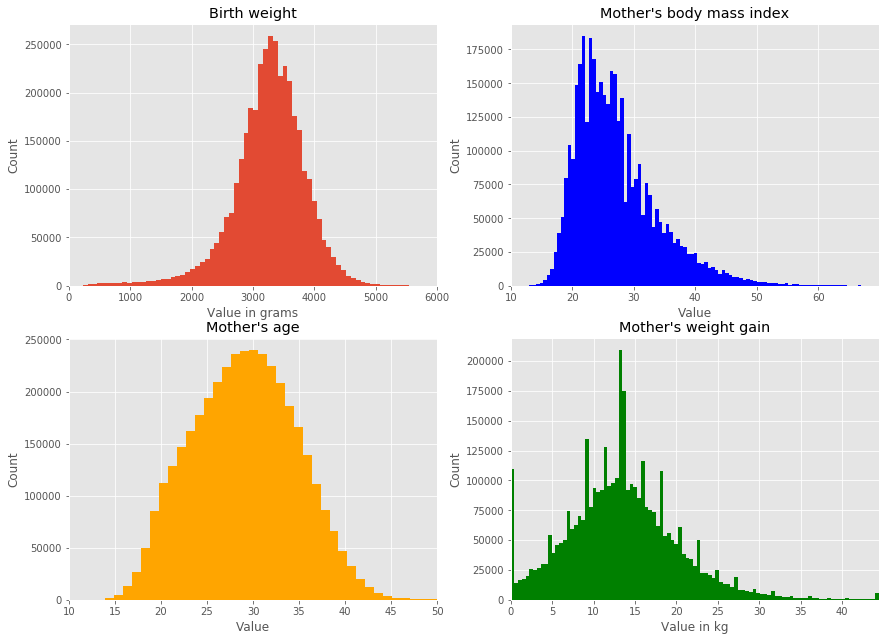

In [12]:
# Distribution  histograms
plt.subplot(221)
plt.hist(dfUS.DBWT, bins=100)
plt.xlabel("Value in grams")
plt.ylabel("Count")
plt.title("Birth weight")
plt.xlim(0, 6000)

plt.subplot(222)
plt.hist(dfUS.BMI, bins=100, color="blue")
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Mother's body mass index")
plt.xlim(10, dfUS["BMI"].max())

plt.subplot(223)
plt.hist(dfUS.MAGER, bins=39, color="orange")
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Mother's age")
plt.xlim(10, 50)

plt.subplot(224)
plt.hist(dfUS.WTGAIN_kg, bins=99,color="green")
plt.xlabel("Value in kg")
plt.ylabel("Count")
plt.title("Mother's weight gain")
plt.xlim(0, dfUS["WTGAIN_kg"].max())

plt.subplots_adjust(bottom=-1, right=2, top=1)
plt.show()

All of the variables have more or less normal bell shaped distributions.    
Mother's weight gain peak is a bit high beacuse of imposing unknown values with mean.

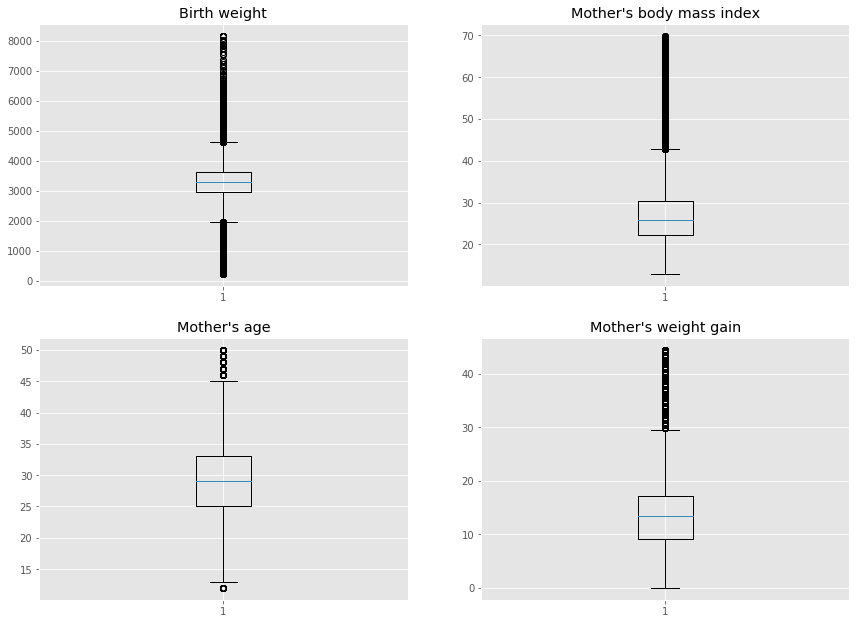

In [13]:
#Box and whisker plots
plt.subplot(221)
plt.boxplot(dfUS.DBWT)
plt.title("Birth weight")

plt.subplot(222)
plt.boxplot(dfUS.BMI)
plt.title("Mother's body mass index")

plt.subplot(223)
plt.boxplot(dfUS.MAGER)
plt.title("Mother's age")

plt.subplot(224)
plt.boxplot(dfUS.WTGAIN_kg)
plt.title("Mother's weight gain")

plt.subplots_adjust(bottom=-1, right=2, top=1)
plt.show()

Note: Default whiskers are 1.5xIQR.    
We can see that our numerical variables have much outlier values, but this is kind of  expected in a large dataset like this one.

### 5.2. Distribution of categoricals<a name="dvad_distributionc"></a>

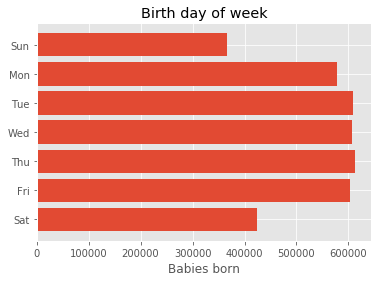

In [14]:
# Bar plot of Birth day of week

DOBWK=dfUS.DOB_WK.value_counts().sort_index(ascending=False)

plt.barh(y=DOBWK.index,width=DOBWK.values)
plt.title("Birth day of week")
plt.xlabel("Babies born")
plt.yticks(DOBWK.index, ('Sat', 'Fri', 'Thu', 'Wed', 'Tue', 'Mon', 'Sun'))
plt.show()

We can see that most babies were born in the middle of the week, more specifically, most of them were born on Thursday.

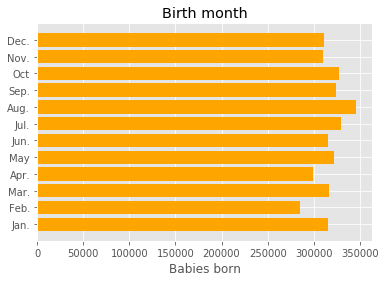

In [15]:
# Bar plot of Birth month

DOBMM=dfUS.DOB_MM.astype(str).astype(int).value_counts().sort_index(ascending=True)

plt.barh(y=DOBMM.index,width=DOBMM.values,color="orange")
plt.title("Birth month")
plt.xlabel("Babies born")
plt.yticks(DOBMM.index, ('Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct', 'Nov.', 'Dec.' ))
plt.show()

August is the month most babies were born in 2018. in US.

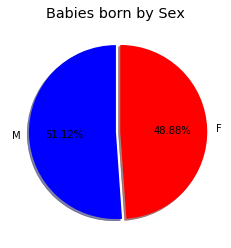

In [16]:
# Pie chart of sex distribution of the babies

slices=dfUS.SEX.value_counts().values
lab=dfUS.SEX.value_counts().index
cols = ["blue","red"]

plt.pie(slices,labels=lab,colors=cols,startangle=90,shadow= True,explode=(0,0.05),autopct='%1.2f%%')
plt.title('Babies born by Sex')
plt.show()

There were more male than female babies born in 2018. in the US.

In [17]:
# Frequency tables of Mother's and Father's race
freq_mrace15=dfUS.MRACE15.astype(str).astype(int).value_counts().sort_values(ascending=False)
freq_frace15=dfUS.FRACE15.astype(str).astype(int).value_counts().sort_values(ascending=False)

race_codes={1:"White", 2:"Black", 3:"AIAN", 4:"Asian Indian", 5:"Chinese", 6:"Filipino", 7:"Japanese", 8:"Korean",
            9:"Vietnamese", 10:"Other Asian",11:"Hawaiian",12:"Guamanian",13:"Samoan",14:"Other Pacific Islander",
            15:"More than one race",99:"Unknown"}
freq_mrace15=freq_mrace15.to_frame()
freq_frace15=freq_frace15.to_frame()
freq_mrace15["%"]=np.round(freq_mrace15.values/len(dfUS)*100,2)
freq_frace15["%"]=np.round(freq_frace15.values/len(dfUS)*100,2)

print(freq_mrace15.rename(index=race_codes))
print("\n")
print(freq_frace15.rename(index=race_codes))

                        MRACE15      %
White                   2797064  73.58
Black                    601598  15.83
More than one race       100613   2.65
Asian Indian              76508   2.01
Chinese                   56513   1.49
Other Asian               48254   1.27
AIAN                      36516   0.96
Filipino                  31011   0.82
Vietnamese                20237   0.53
Korean                    14358   0.38
Other Pacific Islander     7574   0.20
Japanese                   6453   0.17
Samoan                     2272   0.06
Guamanian                  1478   0.04
Hawaiian                   1085   0.03


                        FRACE15      %
White                   2316256  60.93
Unknown                  686911  18.07
Black                    473471  12.45
More than one race        78294   2.06
Asian Indian              74774   1.97
Chinese                   47005   1.24
Other Asian               39477   1.04
AIAN                      24493   0.64
Filipino               

Most mothers were white, black and more than one race.    
Most fathers were white, unknown and black.

In [18]:
# Frequency table of Mother's eduction
freq_meduc=dfUS.MEDUC.astype(str).astype(int).value_counts().sort_values(ascending=False)

codes={1:"8th grade or less", 2:"9th through 12th grade with no diploma", 3:"High school graduate or GED completed",
            4:"Some college credit, but not a degree", 5:"Associate degree (AA,AS)", 6:"Bachelor’s degree (BA, AB, BS)",
            7:"Master’s degree (MA, MS, MEng, MEd, MSW, MBA)", 8:"Doctorate (PhD, EdD) or Professional Degree",9:"Unknown"}

freq_meduc=freq_meduc.to_frame()
freq_meduc["%"]=np.round(freq_meduc.values/len(dfUS)*100,2)

print(freq_meduc.rename(index=codes))

                                                MEDUC      %
High school graduate or GED completed          968380  25.47
Bachelor’s degree (BA, AB, BS)                 776969  20.44
Some college credit, but not a degree          752253  19.79
Master’s degree (MA, MS, MEng, MEd, MSW, MBA)  358924   9.44
9th through 12th grade with no diploma         358686   9.44
Associate degree (AA,AS)                       314455   8.27
8th grade or less                              118177   3.11
Doctorate (PhD, EdD) or Professional Degree    104468   2.75
Unknown                                         49222   1.29


Most mothers were high school level educated, followed by bachelor's degree level.

### 5.3. Variable relationship<a name="dvad_rel"></a>

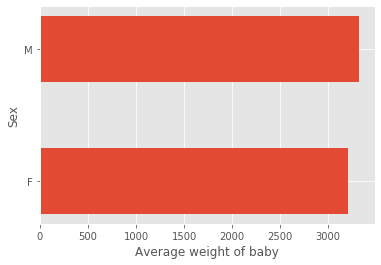

In [19]:
# Let's see if there is a relationship between baby's sex and its weight on birth

plt.barh(y=dfUS.groupby("SEX").mean()["DBWT"].index,width=dfUS.groupby("SEX").mean()["DBWT"].values,height=0.5)
plt.xlabel("Average weight of baby")
plt.ylabel("Sex")
plt.show()

Male babies are heavier on average.

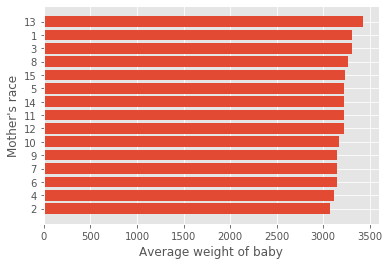

In [20]:
# Mother's race and birth weight
mrace=dfUS.groupby("MRACE15").mean()["DBWT"].sort_values()
plt.barh(y=mrace.index,width=mrace.values)
plt.xlabel("Average weight of baby")
plt.ylabel("Mother's race")
plt.show()

Mothers with code 13(Samoan) carry heaviest babies on average.

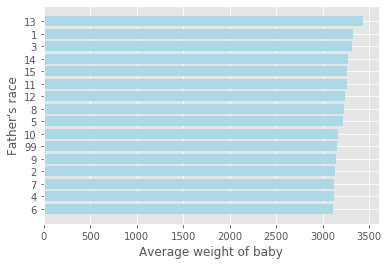

In [21]:
# Father's race and birth weight
frace=dfUS.groupby("FRACE15").mean()["DBWT"].sort_values()
plt.barh(y=frace.index,width=frace.values,color="lightblue")
plt.xlabel("Average weight of baby")
plt.ylabel("Father's race")
plt.show()


On average the heaviest babies are of Samoan fathers.

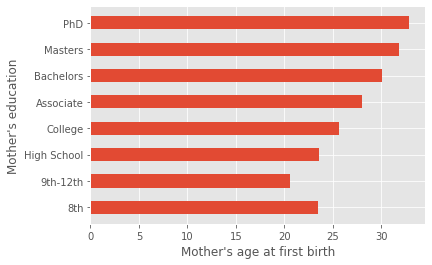

In [22]:
# Mother's age and her education
# Let's see if mother's age at first birth has correlation with her education
# How will we know was this her first birth? We need to pull some more variables from SQL server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-77H1C3V\SQLEXPRESS;'
                      'Database=US2018;'
                      'Trusted_Connection=yes;')

Prior = pd.read_sql_query('''SELECT PRIORLIVE, PRIORDEAD FROM US2018.dbo.Births''', conn)
conn.close()
dfUS2=dfUS.join(Prior)
# Boolean subset -  no prior living or dead childrean, and excluding unknown education level, using literals ("0")
# because those variables are dtype object (string like)
data=dfUS2[(dfUS2.PRIORLIVE=="0")&(dfUS2.PRIORDEAD=="0")&(dfUS2.MEDUC!="9")].groupby("MEDUC").mean()["MAGER"]


plt.barh(y=data.index,width=data.values,height=0.5)
plt.ylabel("Mother's education")
plt.xlabel("Mother's age at first birth")
plt.yticks(np.arange(8), ('8th', '9th-12th', 'High School', 'College', 
                          'Associate', 'Bachelors', 'Masters', 'PhD'))
plt.show()

We can see that there is a trend. Lower the mother's education level is lower is her first birth age.

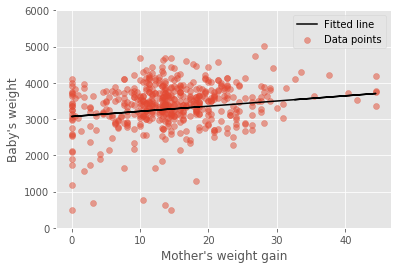

Pearson's r: 0.16362583538411346

R-squared: 0.026773414005148998


In [23]:
# Birth weight and mother's weight gain

#Only first 500 points - for clarity of plot
plt.scatter(dfUS.WTGAIN_kg[:500], dfUS.DBWT[:500], label="Data points",alpha=0.5)
plt.xlabel("Mother's weight gain")
plt.ylabel("Baby's weight")
plt.ylim(0, 6000)

lin_reg=linregress(dfUS.WTGAIN_kg,dfUS.DBWT)

plt.plot(dfUS.WTGAIN_kg, lin_reg.intercept + lin_reg.slope*dfUS.WTGAIN_kg, color="black", label='Fitted line')
plt.legend(loc="upper right")
plt.show()

print("Pearson's r: {}\n".format(lin_reg.rvalue))
print("R-squared: {}" .format(lin_reg.rvalue**2))

Although scatter plot looks there is no correlation.There is a very weak positive correlation according to calculated correlation coef.

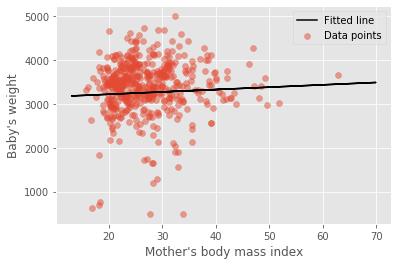

Pearson's r: 0.06108747476315348

R-squared: 0.0037316795729389132


In [24]:
# Birth weight and mother's body mass index

#Only first 500 points - for clarity of plot
plt.scatter(dfUS.BMI[:500], dfUS.DBWT[:500], label="Data points",alpha=0.5)
plt.xlabel("Mother's body mass index")
plt.ylabel("Baby's weight")

lin_reg=linregress(dfUS.BMI,dfUS.DBWT)

plt.plot(dfUS.BMI, lin_reg.intercept + lin_reg.slope*dfUS.BMI, color="black", label='Fitted line')
plt.legend(loc="upper right")
plt.show()

print("Pearson's r: {}\n".format(lin_reg.rvalue))
print("R-squared: {}" .format(lin_reg.rvalue**2))

Even less correlation between baby's weight and mother's body mass index. 